# Fourier Transform

Author: Julian Lißner<br>
For questions and feedback write a mail to: [lissner@mib.uni-stuttgart.de](mailto:lissner@mib.uni-stuttgart.de)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft

## Fast fourier transform (FFT)

- the fourier transform is a recursive divide and conquer algorithm
- the signal is recursively split into even and odd part to reduce the size $n$
- at the lowest level, the DFT has to be computed of $\mathcal O(n_{\rm small}^2)$

## Recursive functions

- a recursive function calls itself
- the function is usually invoked multiple times simultaneously
- the recursion is usually stopped via <br>
`if condition: return result`

In [3]:
def recursion( number, tracker):
    """
    The function calls itself until the number is at least 42
    the tracker tracks how many times it is called 
    (tracker has to be initialized outside the function definition)
    Parameters:
    -----------
    number:     int or float
                recursively passed number in the function
    tracker:    object of int
                trackeing how often the function was called
    Returns:
    --------
    number:     int or float
                number which was doubled 
    """
    print( 'calling the function now')
    tracker[0] += 1
    number = number * 2
    while number <= 42:
        number = recursion( number, tracker)
    print( 'now returning the value')
    return number

In [5]:
tracker = [0]
result = recursion( 1.2, tracker)
print()
print( 'called the function a total amount of {} times, finally got {}'.format( tracker[0], result) )

calling the function now
calling the function now
calling the function now
calling the function now
calling the function now
calling the function now
now returning the value
now returning the value
now returning the value
now returning the value
now returning the value
now returning the value

called the function a total amount of 6 times, finally got 76.8


- what happens is: call $\blacktriangleright$ call $\blacktriangleright$ ... $\blacktriangleright$ call $\blacktriangleright$ return $\blacktriangleright$ return $\blacktriangleright$ ... $\blacktriangleright$ return to result
- depending on the function, multiple return paths are possible (not one path of call $\blacktriangleright$ one path of return )
- FFT works via recursion:
    - split the signal until it is _not too long_
    - compute the DFT 
    - assemble the signal



---------
-----------
## Convolution thereom
- A convolution is defined in a discrete setting as 
$$ (f \ast g)(n) = \sum\limits_{m=-\infty}^{m=\infty} f[m]g[n-m]$$
$\quad$ evaluated for each $n$ in the signal
- the convolution theorem states
$$f \ast g = \mathcal F^{-1}\big( \, \mathcal F(f) \cdot \mathcal F(g) \,\big)$$
constraints:
- $f$ and $g$ have to be of same length
- FFT induces periodicity, if _padding_ is not deployed the signal is treated as periodic
- if the kernel is not centered around 0 (periodicity), a shift is introduced

In [6]:
def convolution( signal, kernel):
    """
    Compute the convolution of signal with kernel exploting
    the convolution theorem for an efficient implementation
    Parameters:
    -----------
    signal:     numpy 1d-array
                signal to apply the convolution on
    kernel:     numpy 1d-array
                kernel to apply on signal
    Returns:
    --------
    convolution:numpy 1d-array
                result of the convolution
    """
    return ifft( fft( signal) * fft( kernel) ).real

In [7]:
n = 60
x = np.arange( 0,1, 1/n) 
signal = np.sin( x*2*np.pi )

h = 2*np.pi/n *2

kernel = np.array( [-1, 0, 1] )/h
derivative = convolution( signal, kernel)

ValueError: operands could not be broadcast together with shapes (60,) (3,) 

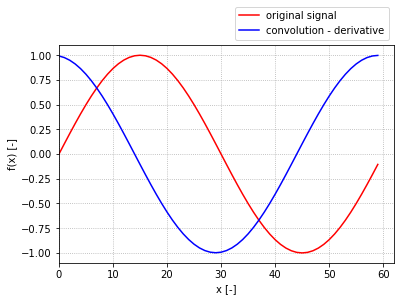

In [8]:
kernel = np.zeros( signal.shape)
kernel[ -2] = 1
kernel[ 0] = -1
kernel = kernel/h

derivative = convolution( signal, kernel)

fig, ax = plt.subplots( figsize=(6, 4) )
ax.plot( signal, color='red', label='original signal' )
ax.plot( derivative, color='blue', label='convolution - derivative' )

def ax_style( ax):
    ax.set_xlabel( 'x [-]')
    ax.set_ylabel( 'f(x) [-]')    
    ax.grid( ls=':', color='#AAAAAA' )
    ax.set_xlim( xmin=0)

ax.legend( bbox_to_anchor=(1.0,1.20))
ax_style( ax)

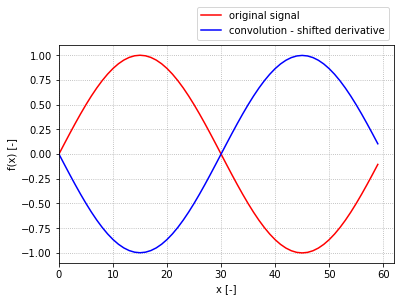

In [9]:
kernel = np.zeros( signal.shape)
kernel[ n//4-1] = -1
kernel[ n//4+1] = 1
kernel = kernel/h

derivative = convolution( signal, kernel)

fig, ax = plt.subplots( figsize=(6, 4) )
ax.plot( signal, color='red', label='original signal' )
ax.plot( derivative, color='blue', label='convolution - shifted derivative' )

ax.legend( bbox_to_anchor=(1.0,1.20))
ax_style( ax)

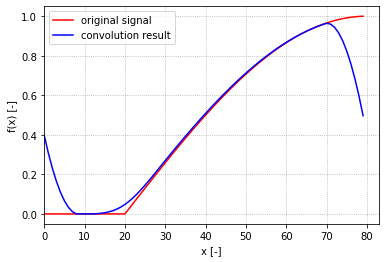

In [10]:
signal = [ np.zeros( 20), np.sin( x*0.5*np.pi) ]
signal = np.hstack( signal )
kernel = np.zeros( signal.shape)
kernel[-10:] = np.arange( 10)
kernel[:10] = np.arange( 9,-1,-1)
kernel = kernel/kernel.sum()

result = convolution( signal, kernel)

fig, ax = plt.subplots( figsize=(6, 4) )
ax.plot( signal, color='red', label='original signal' )
ax.plot( result, color='blue', label='convolution result' )

ax.legend()
ax_style( ax)